In [17]:
#kütüphaneleri içeri aktarıyoruz
import pandas as pd 
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [10]:
#veri setini yüklüyoruz
df = pd.read_csv("IMDB_Dataset.csv")
documents = df["review"]

In [12]:
#metin temizleme 
def clean_text(text):
    #buyuk kucuk harf cevrimi
    text = text.lower()
    
    #rakamları temizleme
    text = re.sub(r"\d+","",text)    

    #ozel karakterlerin kaldırılması
    text = re.sub(r"[^\w\s]","",text)  

    #kısa kelimelerin temizlenmesi(anlamsız kelimelerin temizlenmesi)
    text = " ".join([word for word in text.split() if len(word) > 2 ])

    return text #temizlenmiş text'i döndürüyoruz 
#metinleri temizle
cleaned_documents = [clean_text(doc) for doc in documents]

#metin tokenizasyon
tokenized_documents = [simple_preprocess(doc) for doc in cleaned_documents]




In [22]:
#word2Vec modeli tanimla 
model = Word2Vec(sentences=tokenized_documents, vector_size=2, window=5, min_count=1, sg=0)
word_vectors =model.wv
words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

In [23]:
#clustering kmeans k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)
clusters = kmeans.labels_


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
#pcs 50 -> 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

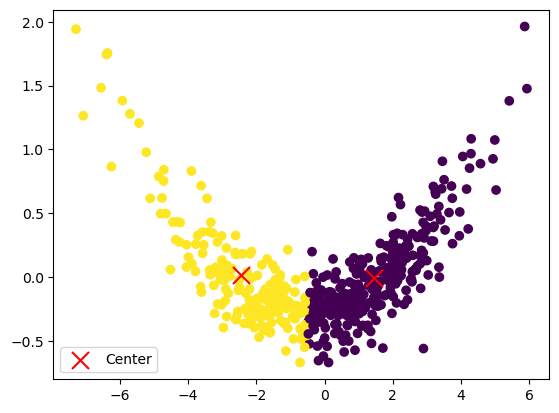

In [25]:
#2 boyutlu birgörselleştirme
plt.figure()
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c= clusters, cmap = "viridis")

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="red", marker ="x", s=150, label="Center")
plt.legend()



Text(0.5, 1.0, 'Word2Vec')

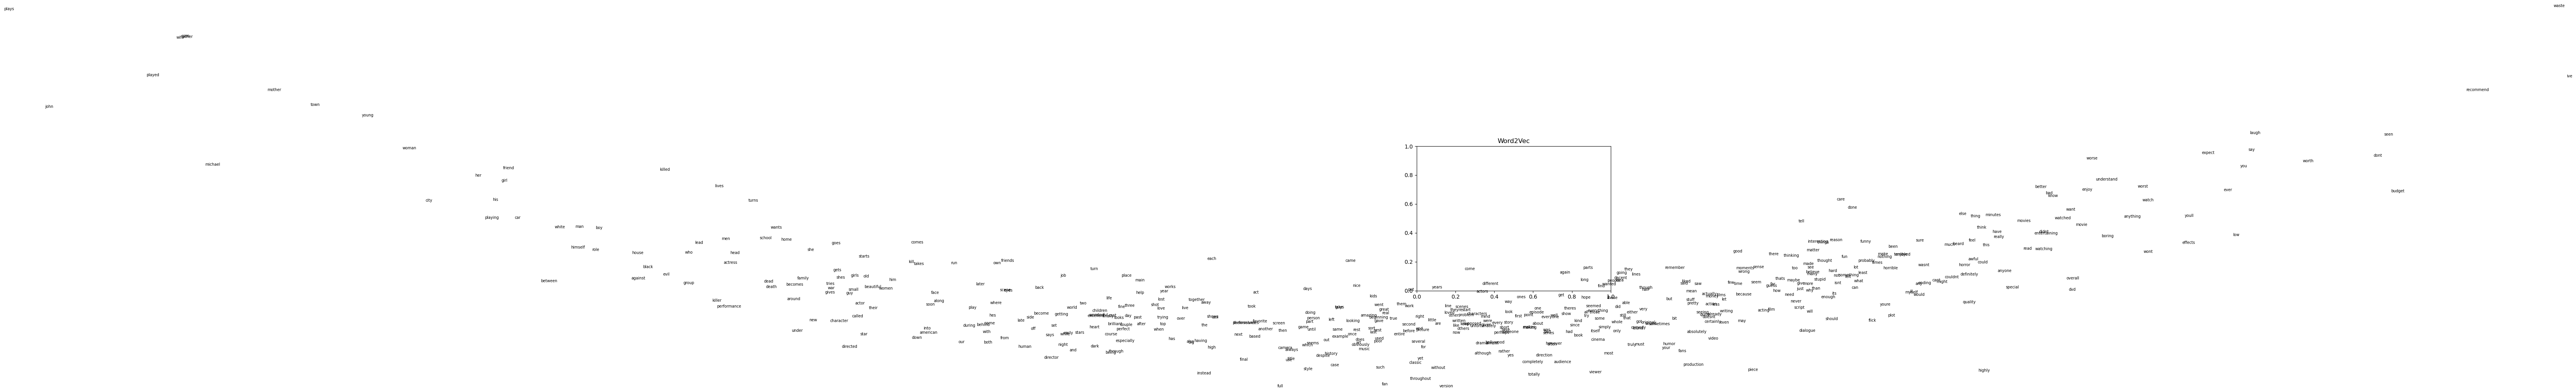

In [26]:
#figur üzerine kelimelerin eklenmesi
for i, word in enumerate(words):
    plt.text(reduced_vectors[i,0],reduced_vectors[i,1], word, fontsize=7)

plt.title("Word2Vec")